In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('iris-data.csv')

In [3]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


/Users/arhamjain/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


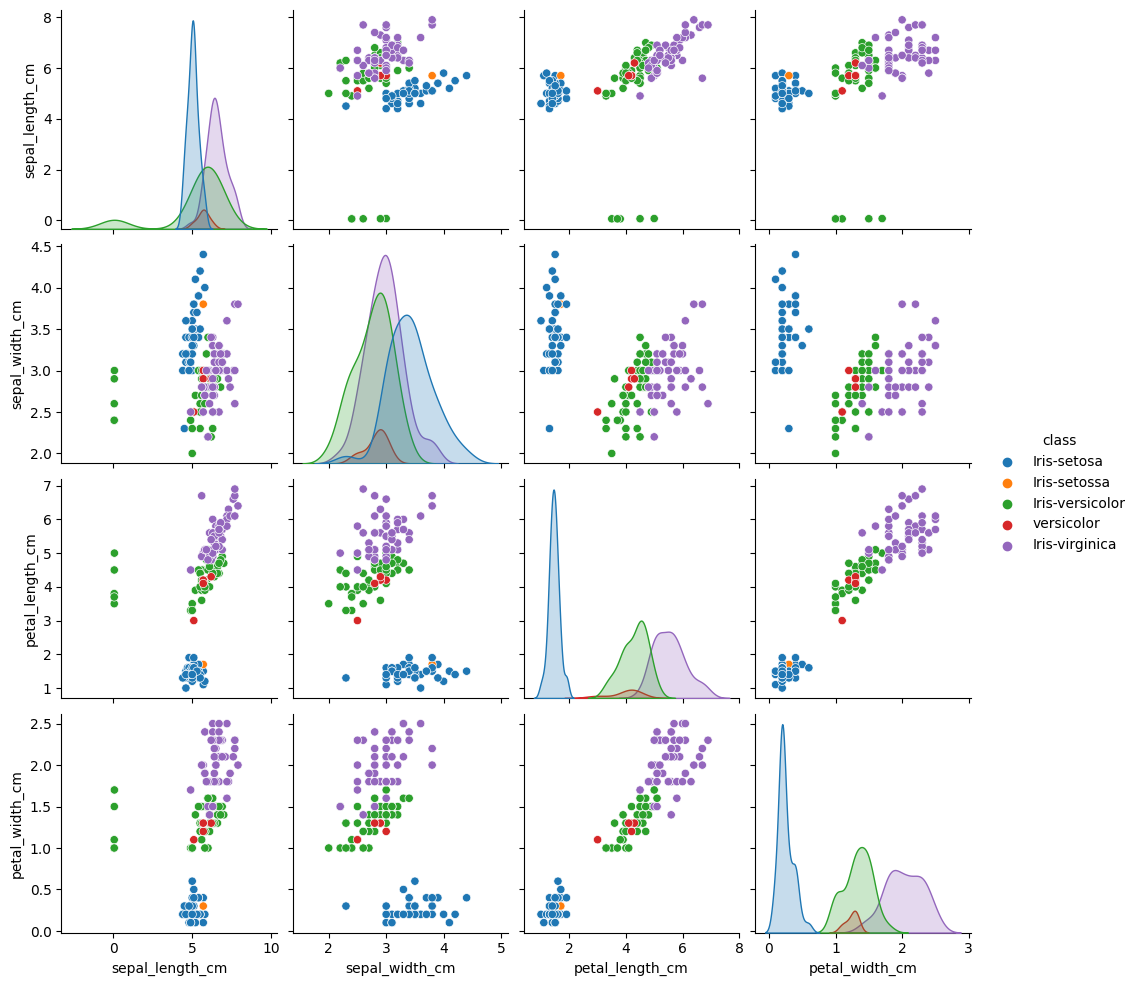

In [6]:
sns.pairplot(df, hue='class', size=2.5)

In [7]:

df['class'].value_counts()
# Two observations can be made from the above results
# - For 5 data points 'Iris-versicolor' has been specified as 'versicolor' 
# - For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [8]:

df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()


# # Simple Logistic Regression

# Consider only two class 'Iris-setosa' and 'Iris-versicolor'. Dropping all other class

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

In [9]:
final_df = df[df['class'] != 'Iris-virginica']

In [10]:
final_df.head()


# # Outlier Check

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/Users/arhamjain/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


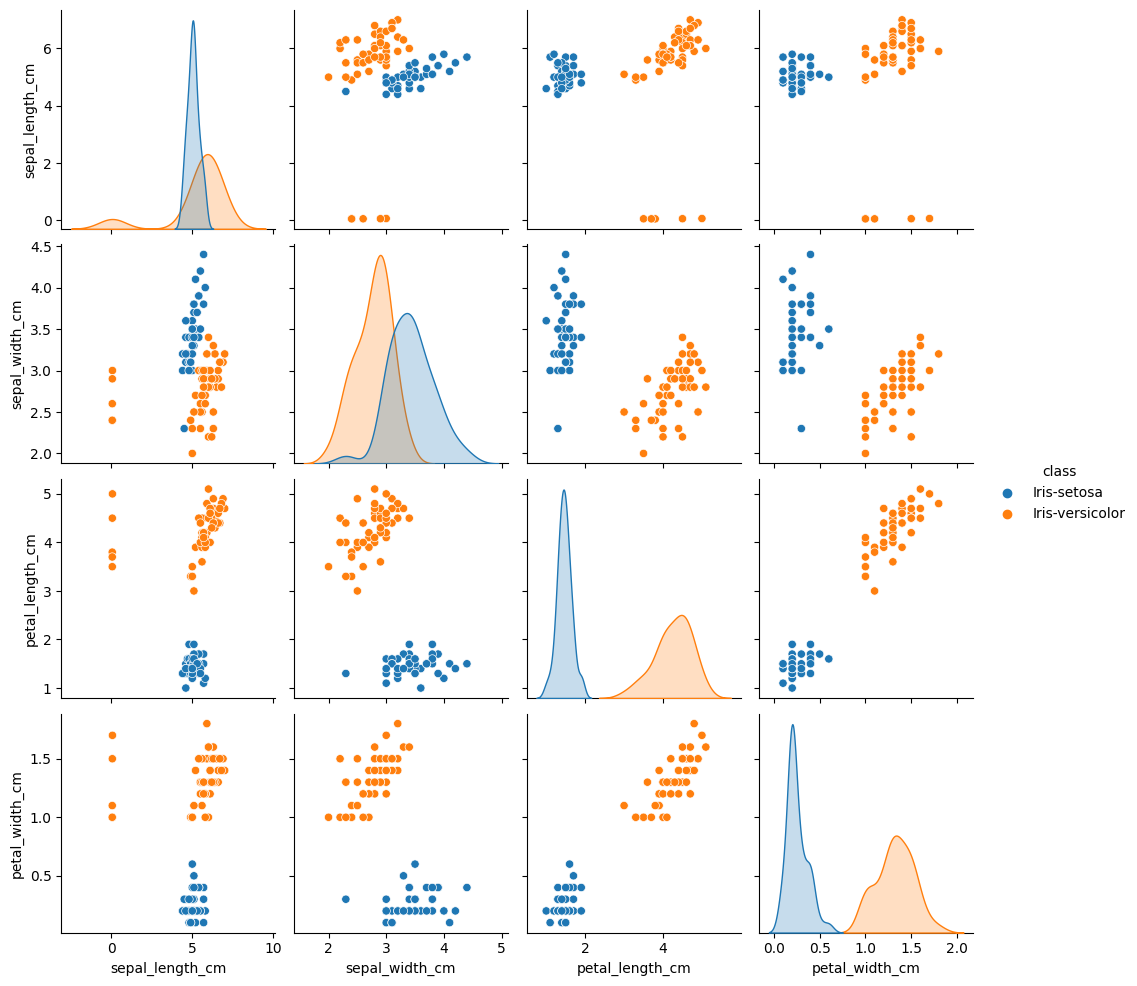

In [11]:
sns.pairplot(final_df, hue='class', size=2.5)


# From the above plot, sepal_width and sepal_length seems to have outliers. To confirm let's plot them seperately

# SEPAL LENGTH

array([[<AxesSubplot: title={'center': 'sepal_length_cm'}>]], dtype=object)

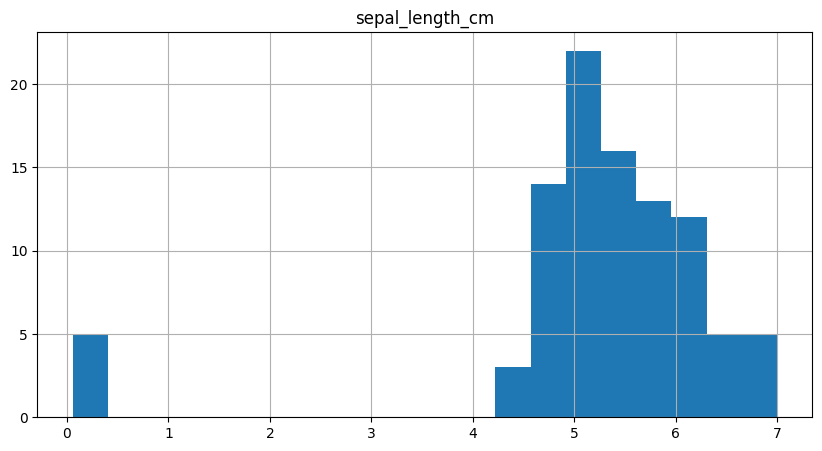

In [12]:

final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))


# It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. So, these data points
# are considered to be in 'm' and are converted to 'cm'.

array([[<AxesSubplot: title={'center': 'sepal_length_cm'}>]], dtype=object)

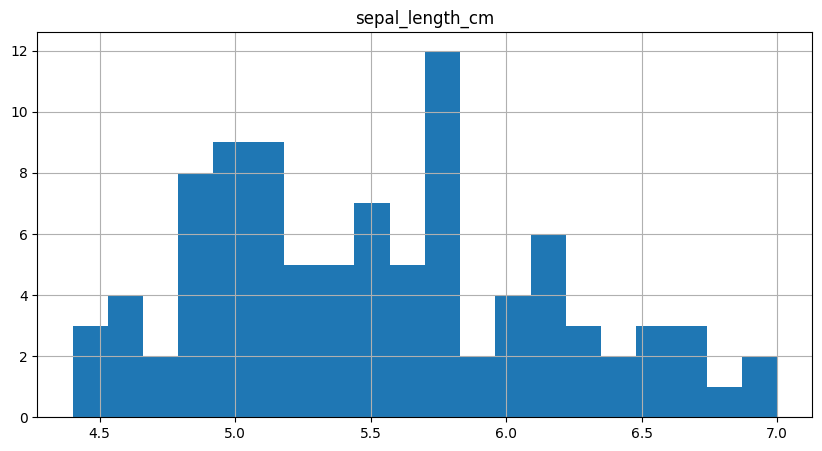

In [13]:

final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

In [14]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

/Users/arhamjain/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


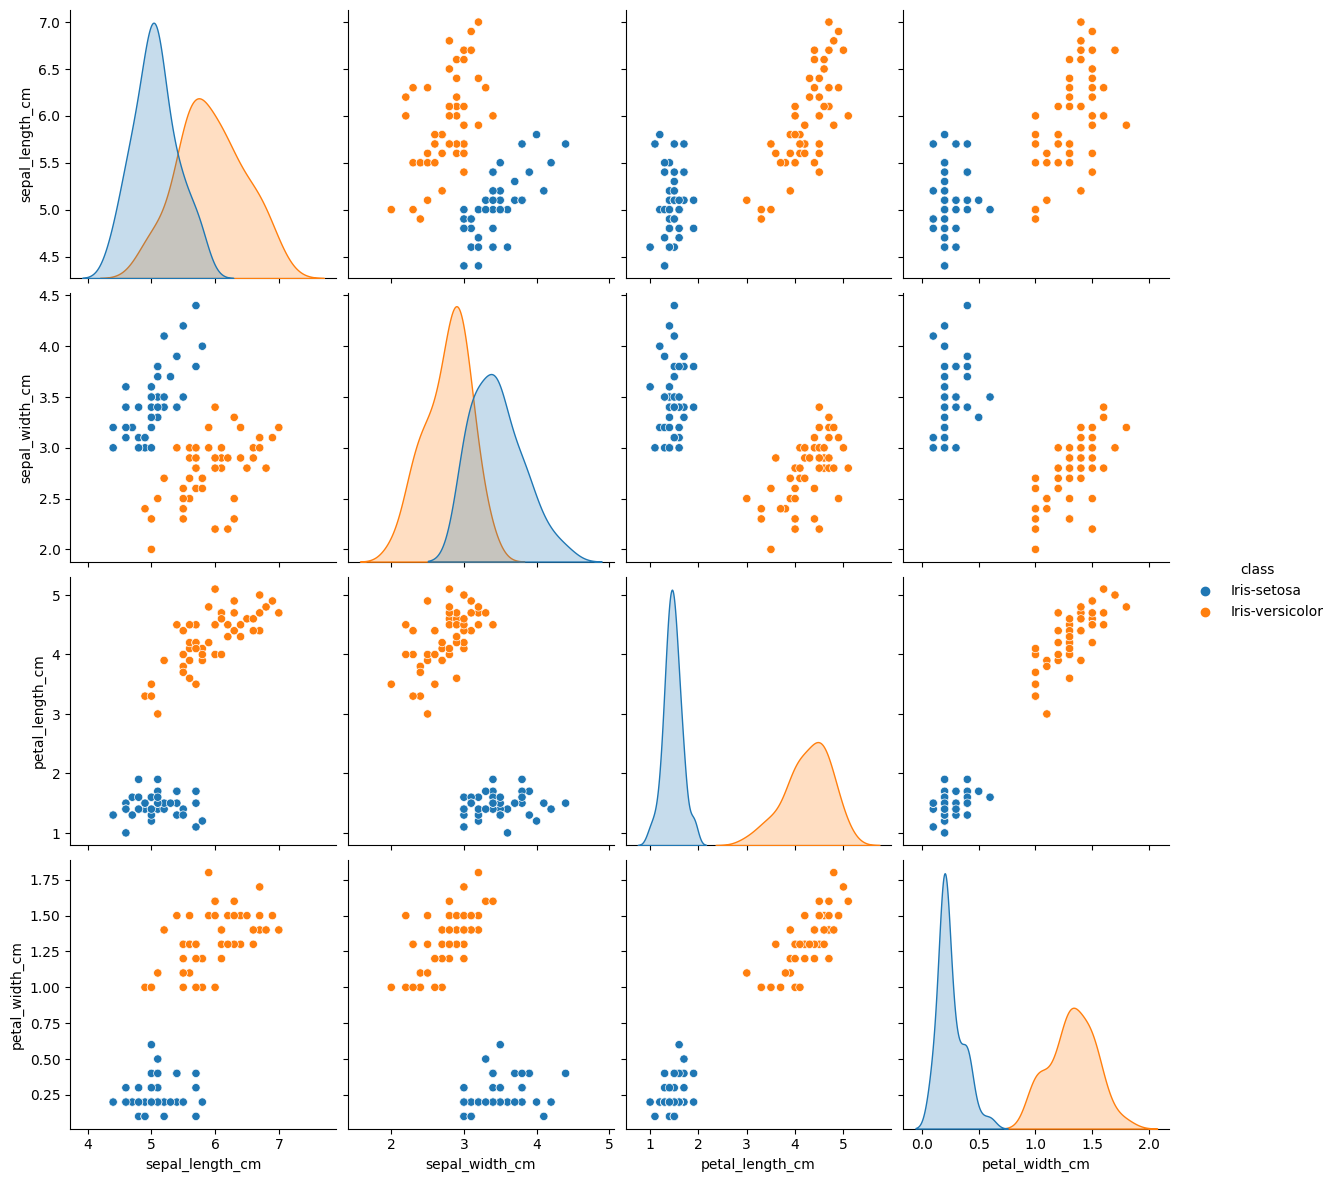

In [15]:
sns.pairplot(final_df, hue='class', size=3)


# Successfully removed outliers!!

# # Label Encoding

In [16]:

final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [17]:

final_df.head()


# # Model Construction

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [18]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)


In [19]:


X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.to_numpy()
y_ts_arr = y_test.to_numpy()
# print(y_tr_arr.shape)

In [20]:

print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_ts_arr.shape)


Input Shape (75, 4)
Output Shape (19, 4)


In [21]:

def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [22]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [23]:
def get_cost(Y, final_result):
    # Calculate the cost using the mean squared error formula
    return np.mean((Y - final_result) ** 2)

In [24]:
def update_theta(w, b, m, X, final_result, alpha):
    # Update the theta and b using gradient descent
    dw = np.dot(X, (final_result - m).T) / m
    db = np.sum(final_result - m) / m
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

In [25]:
def run_gradient_descent(w,b,X,Y,alpha,num_iterations):
    gd_iteration_temp_ans=pd.DataFrame(columns=['Min-Iteration','cost','alpha'])
    iter_num=0
    result_idx=0
    flag=0
    this_cost_prev=10
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost','alpha'])
    for each_iter in range(num_iterations):
        # Y_hat=predict_Y(b,theta,X)

        final_result = sigmoid_activation(np.dot(w,X.T)+b)
        Y_T = Y.T
        m = X.shape[0]
        this_cost = get_cost(m,Y_T,final_result) #gets cost
        
        if abs(this_cost-this_cost_prev)<0.00001 and flag==0:
          gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)
          flag=1
        
        this_cost_prev=this_cost
        prev_b=b
        prev_theta=w
        
        # b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        w,b=update_theta(w,b,m,X,Y,final_result,alpha)
        
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost,alpha]
        result_idx=result_idx+1
        iter_num +=1
        # print(b)
    print("For alpha= "+str(alpha)+" Final Estimate of b and theta :",b,w)
    return gd_iterations_df,b,w,gd_iteration_temp_ans

In [26]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [27]:
gd_iteration_ans=pd.DataFrame(columns=['Min-Iteration','cost','alpha'])

In [28]:

def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 10 == 0):
            costs.append(cost)
            print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs


In [29]:

#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

NameError: name 'w' is not defined

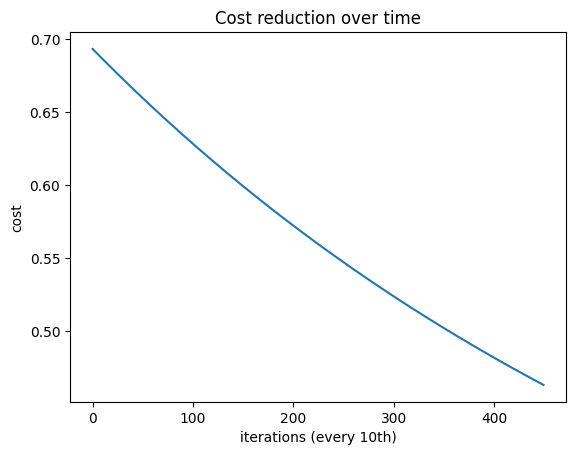

In [ ]:

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (every 10th)')
plt.title('Cost reduction over time')
plt.show()


In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_tr_arr, y_tr_arr)

/Users/arhamjain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print (clf.intercept_, clf.coef_)

[-0.55607279] [[-0.69791666  1.16455265 -1.40231641 -1.47095115]]


In [ ]:
pred = clf.predict(X_ts_arr)

In [ ]:


print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 1.0
